# NIFTY-50 Stock Market Data_Time Series

In [ ]:
dataset_url = 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data?select=HCLTECH.csv' 

In [1]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73049 sha256=98ac5ffc02f9254a047bf693870171efe9a7f7c18e65788928605de42ee4abe7
  Stored in directory: c:\users\utilisateur\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  FEATURE ENGINEERING

In [3]:
Dr_Reddy_df=pd.read_csv('DRREDDY.csv')
Cipla_df=pd.read_csv('CIPLA.csv')
Sun_pharma_df=pd.read_csv('SUNPHARMA.csv')

In [4]:
Dr_Reddy_df['Date']=pd.to_datetime(Dr_Reddy_df['Date'],format='%Y-%m-%d')
Cipla_df['Date']=pd.to_datetime(Cipla_df['Date'],format='%Y-%m-%d')
Sun_pharma_df['Date']=pd.to_datetime(Sun_pharma_df['Date'],format='%Y-%m-%d')

In [5]:
# Pharma Companies
Dr_Reddy_df_20=Dr_Reddy_df.loc[(Dr_Reddy_df['Date']>='2020-03-28')]
Cipla_df_20=Cipla_df.loc[(Cipla_df['Date']>='2020-03-28')]
Sun_pharma_df_20=Sun_pharma_df.loc[(Sun_pharma_df['Date']>='2020-03-28')]


In [6]:
Dr_Reddy_df_20.head(10)

Date   Symbol Series  Prev Close     Open     High      Low  \
5036 2020-03-30  DRREDDY     EQ     2916.50  2879.60  3050.00  2811.00   
5037 2020-03-31  DRREDDY     EQ     2994.25  3050.00  3152.00  3032.05   
5038 2020-04-01  DRREDDY     EQ     3120.75  3119.95  3144.00  3066.00   
5039 2020-04-03  DRREDDY     EQ     3095.00  3085.00  3218.85  3025.10   
5040 2020-04-07  DRREDDY     EQ     3146.80  3250.00  3615.60  3210.00   
5041 2020-04-08  DRREDDY     EQ     3583.20  3525.00  3765.00  3471.00   
5042 2020-04-09  DRREDDY     EQ     3683.00  3740.00  3810.00  3593.20   
5043 2020-04-13  DRREDDY     EQ     3621.55  3694.00  3856.00  3607.20   
5044 2020-04-15  DRREDDY     EQ     3746.60  3825.00  3893.60  3776.00   
5045 2020-04-16  DRREDDY     EQ     3807.60  3806.40  3890.00  3780.00   

         Last    Close     VWAP   Volume      Turnover    Trades  \
5036  2990.10  2994.25  2988.10  1150459  3.437685e+14   74922.0   
5037  3119.00  3120.75  3105.31  1002756  3.113864e+14   84109.0   
5038  3102.00  3095.00  3097.23   711048  2.202280e+14   67620.0   
5039  3146.85  3146.80  3143.89  1173674  3.689905e+14   95189.0   
5040  3599.95  3583.20  3476.74  2367583  8.231477e+14  141819.0   
5041  3697.80  3683.00  3674.62  2522297  9.268483e+14  178903.0   
5042  3603.50  3621.55  3711.74  1960953  7.278550e+14  124240.0   
5043  3759.90  3746.60  3777.99  2322394  8.773978e+14  151314.0   
5044  3805.40  3807.60  3843.63  1725113  6.630697e+14  123319.0   
5045  3848.95  3860.65  3846.70  1465944  5.639047e+14  104152.0   

      Deliverable Volume  %Deliverble  
5036            466633.0       0.4056  
5037            316911.0       0.3160  
5038            269221.0       0.3786  
5039            314667.0       0.2681  
5040            616684.0       0.2605  
5041            760362.0       0.3015  
5042            516310.0       0.2633  
5043            397802.0       0.1713  
5044            439005.0       0.2545  
5045            385432.0       0.2629

In [7]:
Dr_Reddy_df_20.describe()

Prev Close         Open         High          Low         Last  \
count   270.000000   270.000000   270.000000   270.000000   270.000000   
mean   4525.142778  4541.194259  4602.578704  4474.153148  4534.616667   
std     514.008172   516.222688   511.386892   508.219906   506.905167   
min    2916.500000  2879.600000  3050.000000  2811.000000  2990.100000   
25%    4038.000000  4047.925000  4127.162500  4006.375000  4047.137500   
50%    4519.900000  4545.000000  4588.000000  4484.025000  4527.350000   
75%    5010.637500  5020.750000  5075.500000  4921.575000  5012.500000   
max    5416.800000  5440.950000  5512.650000  5329.450000  5413.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count   270.000000   270.000000  2.700000e+02  2.700000e+02     270.000000   
mean   4533.463519  4540.031815  1.550612e+06  7.235782e+14   92068.848148   
std     505.992155   507.152341  1.798141e+06  9.328346e+14   80510.143421   
min    2994.250000  2988.100000  1.352160e+05  6.585270e+13    8648.000000   
25%    4044.825000  4053.992500  7.866565e+05  3.426225e+14   55181.000000   
50%    4520.725000  4534.670000  1.091156e+06  5.028309e+14   73473.000000   
75%    5016.512500  5018.862500  1.702283e+06  7.705201e+14   98306.750000   
max    5416.800000  5396.870000  2.198715e+07  1.157853e+16  929801.000000   

       Deliverable Volume  %Deliverble  
count        2.700000e+02   270.000000  
mean         3.380658e+05     0.266047  
std          2.206068e+05     0.105059  
min          3.807100e+04     0.036800  
25%          2.118302e+05     0.183300  
50%          2.779905e+05     0.263850  
75%          3.829472e+05     0.335025  
max          1.794151e+06     0.612600

In [8]:
Dr_Reddy_df_20.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
Dr_Reddy_df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 5036 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                270 non-null    datetime64[ns]
 1   Symbol              270 non-null    object        
 2   Series              270 non-null    object        
 3   Prev Close          270 non-null    float64       
 4   Open                270 non-null    float64       
 5   High                270 non-null    float64       
 6   Low                 270 non-null    float64       
 7   Last                270 non-null    float64       
 8   Close               270 non-null    float64       
 9   VWAP                270 non-null    float64       
 10  Volume              270 non-null    int64         
 11  Turnover            270 non-null    float64       
 12  Trades              270 non-null    float64       
 13  Deliverable Volume  270 non-null    float64   

# EDA - DATA VISUALIZATION

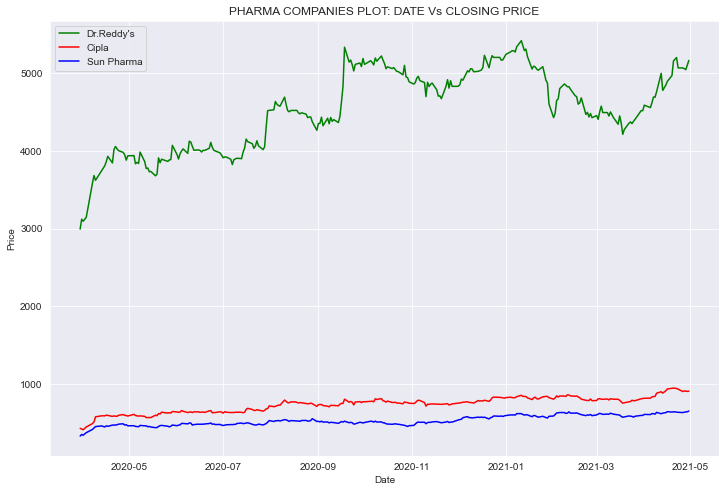

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20.Close,'g')
plt.plot(Cipla_df_20.Date,Cipla_df_20.Close,'r')
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20.Close,'b')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("PHARMA COMPANIES PLOT: DATE Vs CLOSING PRICE")
plt.legend(["Dr.Reddy's","Cipla","Sun Pharma"])

#### I. First we need to calculate the difference in price i.e, present price with respect to price during the last week of March

In [11]:
Sun_pharma_df_20['Value_change']=Sun_pharma_df_20.apply(lambda row:row.Close-Sun_pharma_df_20.Close.iloc[0],axis=1)
Dr_Reddy_df_20['Value_change']=Dr_Reddy_df_20.apply(lambda row:row.Close-Dr_Reddy_df_20.Close.iloc[0],axis=1)
Cipla_df_20['Value_change']=Cipla_df_20.apply(lambda row:row.Close-Cipla_df_20.Close.iloc[0],axis=1)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\461079238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sun_pharma_df_20['Value_change']=Sun_pharma_df_20.apply(lambda row:row.Close-Sun_pharma_df_20.Close.iloc[0],axis=1)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\461079238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dr_Reddy_df_20['Value_change']=Dr_Reddy_df_20.apply(lambda row:row.Close-Dr_Reddy_df_20.Close.iloc[0],axis=1)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_63

#### *Value change of Sunpharma with respect to the initial days of covid*

<AxesSubplot:xlabel='Date'>

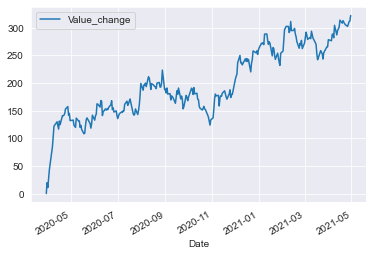

In [12]:
Sun_pharma_df_20.plot(x="Date",y="Value_change")

#### *Value change of Dr.Reddy's with respect to the initial days of covid*

<AxesSubplot:xlabel='Date'>

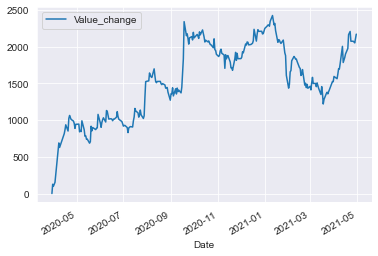

In [13]:
Dr_Reddy_df_20.plot(x="Date",y="Value_change")

#### *Value change of Cipla with respect to the initial days of covid*

<AxesSubplot:xlabel='Date'>

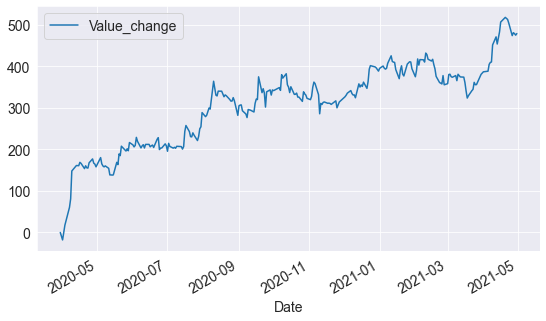

In [14]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
Cipla_df_20.plot(x="Date",y="Value_change")

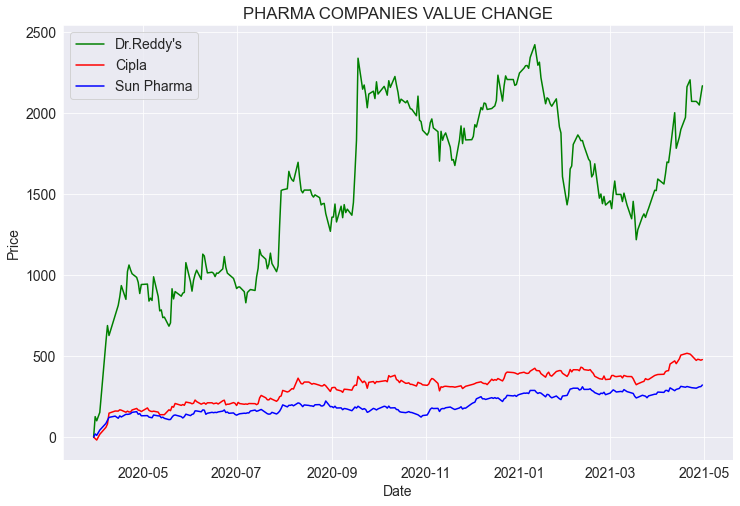

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20['Value_change'],'g')
plt.plot(Cipla_df_20.Date,Cipla_df_20['Value_change'],'r')
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20['Value_change'],'b')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("PHARMA COMPANIES VALUE CHANGE")
plt.legend(["Dr.Reddy's","Cipla","Sun Pharma"])

#### I. To make the plot we need to add a column by making a *simple percentage calculation* with respect to day's closing price and starting price 

In [16]:
Sun_pharma_df_20["Percentage_change"]=Sun_pharma_df_20.apply(lambda row:((row.Close/Sun_pharma_df_20.Close.iloc[0])-1)*100,axis=1)
Dr_Reddy_df_20["Percentage_change"]=Dr_Reddy_df_20.apply(lambda row:((row.Close/Dr_Reddy_df_20.Close.iloc[0])-1)*100,axis=1)
Cipla_df_20["Percentage_change"]=Cipla_df_20.apply(lambda row:((row.Close/Cipla_df_20.Close.iloc[0])-1)*100,axis=1)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\3377804209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sun_pharma_df_20["Percentage_change"]=Sun_pharma_df_20.apply(lambda row:((row.Close/Sun_pharma_df_20.Close.iloc[0])-1)*100,axis=1)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\3377804209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dr_Reddy_df_20["Percentage_change"]=Dr_Reddy_df_20.apply(lambda row:((row.Close/Dr_Reddy_df_20.Close.iloc[0])-1)*100,axis=1)
C:\Users\Utilisateur

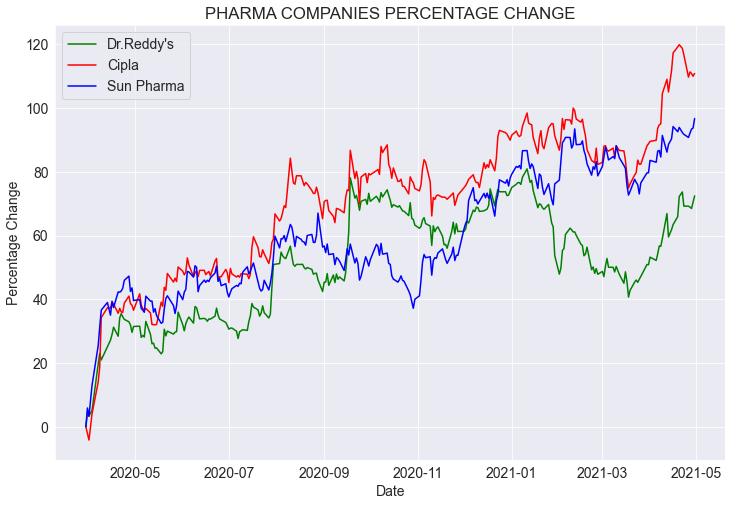

In [17]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20['Percentage_change'],'g')
plt.plot(Cipla_df_20.Date,Cipla_df_20['Percentage_change'],'r')
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20['Percentage_change'],'b')
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.title("PHARMA COMPANIES PERCENTAGE CHANGE")
plt.legend(["Dr.Reddy's","Cipla","Sun Pharma"])

In [18]:
Dr_Reddy_df_20['Moving Average_9']=Dr_Reddy_df_20['Close'].rolling(window=9).mean()
Dr_Reddy_df_20['Moving Average_50']=Dr_Reddy_df_20['Close'].rolling(window=50).mean()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\1537512276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dr_Reddy_df_20['Moving Average_9']=Dr_Reddy_df_20['Close'].rolling(window=9).mean()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\1537512276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dr_Reddy_df_20['Moving Average_50']=Dr_Reddy_df_20['Close'].rolling(window=50).mean()


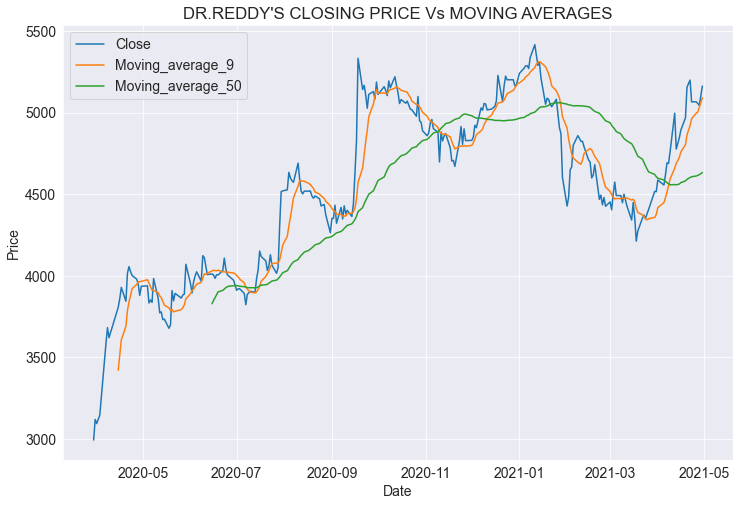

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20.Close)
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20['Moving Average_9'])
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20['Moving Average_50'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['Close','Moving_average_9','Moving_average_50'])
plt.title("DR.REDDY'S CLOSING PRICE Vs MOVING AVERAGES");

In [20]:
Cipla_df_20['Moving Average_9']=Cipla_df_20['Close'].rolling(window=9).mean()
Cipla_df_20['Moving Average_50']=Cipla_df_20['Close'].rolling(window=50).mean()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\1337316734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cipla_df_20['Moving Average_9']=Cipla_df_20['Close'].rolling(window=9).mean()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\1337316734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cipla_df_20['Moving Average_50']=Cipla_df_20['Close'].rolling(window=50).mean()


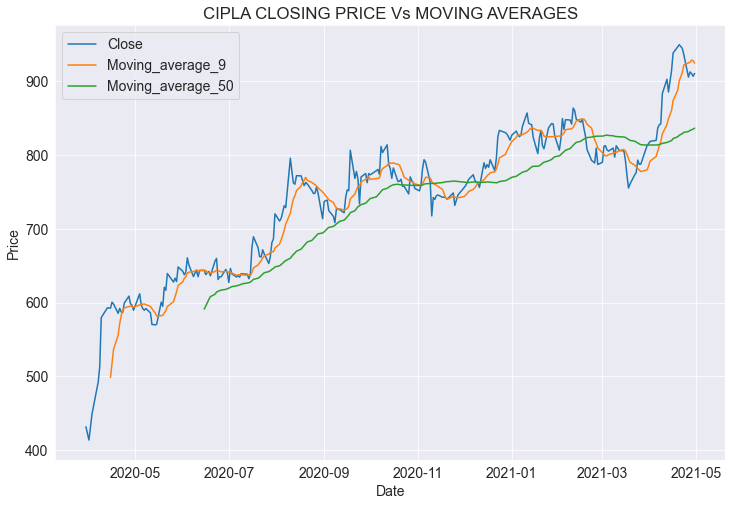

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.plot(Cipla_df_20.Date,Cipla_df_20.Close)
plt.plot(Cipla_df_20.Date,Cipla_df_20['Moving Average_9'])
plt.plot(Cipla_df_20.Date,Cipla_df_20['Moving Average_50'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['Close','Moving_average_9','Moving_average_50'])
plt.title("CIPLA CLOSING PRICE Vs MOVING AVERAGES");

In [22]:
Sun_pharma_df_20['Moving Average_9']=Sun_pharma_df_20['Close'].rolling(window=9).mean()
Sun_pharma_df_20['Moving Average_50']=Sun_pharma_df_20['Close'].rolling(window=50).mean()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\274189305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sun_pharma_df_20['Moving Average_9']=Sun_pharma_df_20['Close'].rolling(window=9).mean()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\274189305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sun_pharma_df_20['Moving Average_50']=Sun_pharma_df_20['Close'].rolling(window=50).mean()


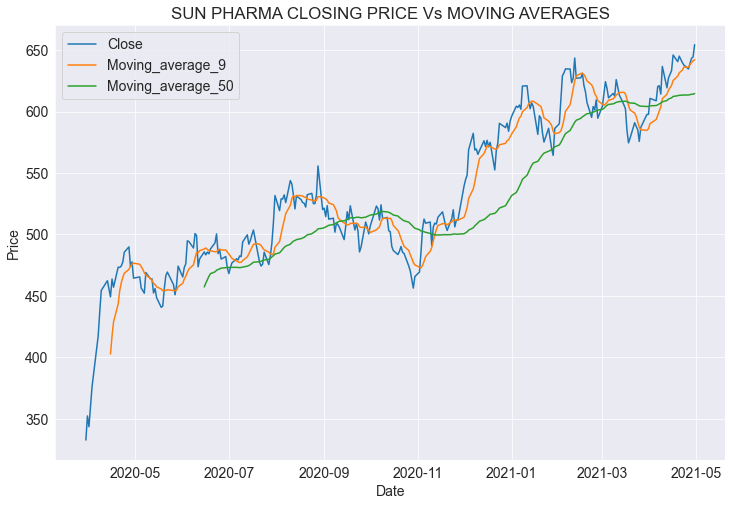

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20.Close)
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20['Moving Average_9'])
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20['Moving Average_50'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['Close','Moving_average_9','Moving_average_50'])
plt.title("SUN PHARMA CLOSING PRICE Vs MOVING AVERAGES");

# STEP 4: A FEW QUESTIONS 

### 1) whats the Maximum closing price for Dr.Pharma Company?

In [24]:
x=Dr_Reddy_df_20.Close.max()
print("The Maximum Closing price for Dr.Pharma is",x)

The Maximum Closing price for Dr.Pharma is 5416.8


### 2) whats the Maximum closing price for Cipla Company?

In [25]:
x=Cipla_df_20.Close.max()
print("The Maximum Closing price for Cipla is",x)

The Maximum Closing price for Cipla is 949.3


### 3) whats the Maximum closing price for Sun Pharma Company?

In [26]:
x=Sun_pharma_df_20.Close.max()
print("The Maximum Closing price for Sun Pharma is",x)

The Maximum Closing price for Sun Pharma is 654.45


### 4) What's the maximum value change and percentage difference with respect to initial day of Covid for Dr.Pharma Company?

In [27]:
max_value_change=Dr_Reddy_df_20['Value_change'].max()

In [28]:
max_index=Dr_Reddy_df_20['Value_change'].idxmax()
max_date=Dr_Reddy_df_20['Date'][max_index]

In [29]:
max_diff_percen=Dr_Reddy_df_20['Percentage_change'][max_index]

In [30]:
print("Dr.Pharma has a growth of {}% of {} value change on {} from the initial days of Covid".format(round(max_diff_percen,2),round(max_value_change,2),max_date))

Dr.Pharma has a growth of 80.91% of 2422.55 value change on 2021-01-11 00:00:00 from the initial days of Covid


### 5) What's the maximum value change and percentage difference with respect to initial day of Covid for Cipla Company?

In [31]:
max_value_change=Cipla_df_20['Value_change'].max()
max_index=Cipla_df_20['Value_change'].idxmax()
max_date=Cipla_df_20['Date'][max_index]
max_diff_percen=Cipla_df_20['Percentage_change'][max_index]
print("Cipla has a growth of {}% of {} value change on {} from the initial days of Covid".format(round(max_diff_percen,2),round(max_value_change,2),max_date))

Cipla has a growth of 119.87% of 517.55 value change on 2021-04-20 00:00:00 from the initial days of Covid


### 6) What's the maximum value change and percentage difference with respect to initial day of Covid for Sun Pharma Company?

In [32]:
max_value_change=Sun_pharma_df_20['Value_change'].max()
max_index=Sun_pharma_df_20['Value_change'].idxmax()
max_date=Sun_pharma_df_20['Date'][max_index]
max_diff_percen=Sun_pharma_df_20['Percentage_change'][max_index]
print("Sun Pharma has a growth of {}% of {} value change on {} from the initial days of Covid".format(round(max_diff_percen,2),round(max_value_change,2),max_date))

Sun Pharma has a growth of 96.71% of 321.75 value change on 2021-04-30 00:00:00 from the initial days of Covid


In [33]:
Dr_Reddy_df_20

Date   Symbol Series  Prev Close     Open     High      Low  \
5036 2020-03-30  DRREDDY     EQ     2916.50  2879.60  3050.00  2811.00   
5037 2020-03-31  DRREDDY     EQ     2994.25  3050.00  3152.00  3032.05   
5038 2020-04-01  DRREDDY     EQ     3120.75  3119.95  3144.00  3066.00   
5039 2020-04-03  DRREDDY     EQ     3095.00  3085.00  3218.85  3025.10   
5040 2020-04-07  DRREDDY     EQ     3146.80  3250.00  3615.60  3210.00   
...         ...      ...    ...         ...      ...      ...      ...   
5301 2021-04-26  DRREDDY     EQ     5066.70  5125.00  5130.00  5030.25   
5302 2021-04-27  DRREDDY     EQ     5066.70  5090.50  5116.00  5021.35   
5303 2021-04-28  DRREDDY     EQ     5057.25  5082.55  5106.90  5030.00   
5304 2021-04-29  DRREDDY     EQ     5044.45  5070.25  5144.00  5042.30   
5305 2021-04-30  DRREDDY     EQ     5102.30  5140.00  5211.00  5125.15   

         Last    Close     VWAP   Volume      Turnover    Trades  \
5036  2990.10  2994.25  2988.10  1150459  3.437685e+14   74922.0   
5037  3119.00  3120.75  3105.31  1002756  3.113864e+14   84109.0   
5038  3102.00  3095.00  3097.23   711048  2.202280e+14   67620.0   
5039  3146.85  3146.80  3143.89  1173674  3.689905e+14   95189.0   
5040  3599.95  3583.20  3476.74  2367583  8.231477e+14  141819.0   
...       ...      ...      ...      ...           ...       ...   
5301  5067.00  5066.70  5078.16   950577  4.827178e+14   70675.0   
5302  5062.00  5057.25  5065.33   957835  4.851746e+14   64767.0   
5303  5048.00  5044.45  5065.54   843953  4.275075e+14   69716.0   
5304  5106.00  5102.30  5098.90  1071931  5.465666e+14   74199.0   
5305  5169.00  5163.10  5170.81  1306950  6.757985e+14   80394.0   

      Deliverable Volume  %Deliverble  Value_change  Percentage_change  \
5036            466633.0       0.4056          0.00           0.000000   
5037            316911.0       0.3160        126.50           4.224764   
5038            269221.0       0.3786        100.75           3.364782   
5039            314667.0       0.2681        152.55           5.094765   
5040            616684.0       0.2605        588.95          19.669366   
...                  ...          ...           ...                ...   
5301            217218.0       0.2285       2072.45          69.214327   
5302            260296.0       0.2718       2063.00          68.898723   
5303            184756.0       0.2189       2050.20          68.471237   
5304            211996.0       0.1978       2108.05          70.403273   
5305            398563.0       0.3050       2168.85          72.433832   

      Moving Average_9  Moving Average_50  
5036               NaN                NaN  
5037               NaN                NaN  
5038               NaN                NaN  
5039               NaN                NaN  
5040               NaN                NaN  
...                ...                ...  
5301       4996.794444           4612.040  
5302       5003.494444           4616.303  
5303       5033.177778           4620.711  
5304       5061.705556           4626.256  
5305       5091.688889           4633.678  

[270 rows x 19 columns]

### *5) plot the daily volume post covid*

<BarContainer object of 270 artists>

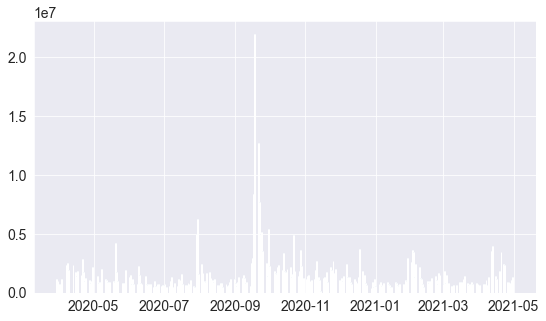

In [34]:
plt.bar(Dr_Reddy_df_20.Date,Dr_Reddy_df_20.Volume)

<BarContainer object of 270 artists>

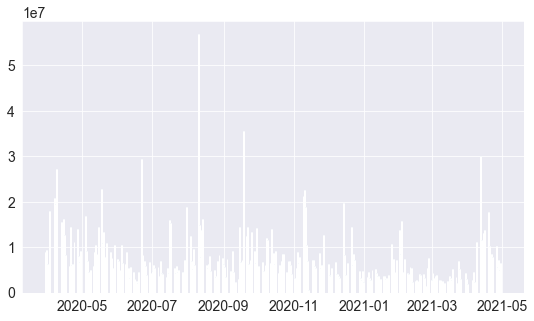

In [35]:
plt.bar(Cipla_df_20.Date,Cipla_df_20.Volume)

<BarContainer object of 270 artists>

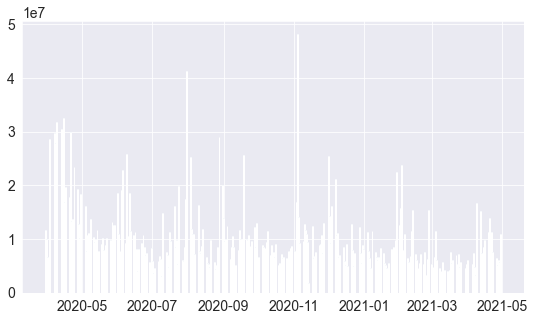

In [36]:
plt.bar(Sun_pharma_df_20.Date,Sun_pharma_df_20.Volume)

### *6) Plot a chart with percentage of Deliverble with respect to volume*

<AxesSubplot:xlabel='Volume', ylabel='%Deliverble'>

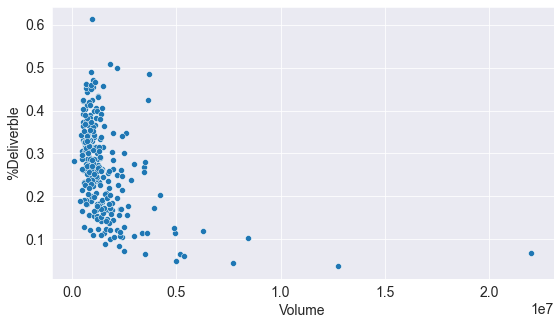

In [37]:
sns.scatterplot(x=Dr_Reddy_df_20.Volume,y=Dr_Reddy_df_20['%Deliverble'])

<AxesSubplot:xlabel='Volume', ylabel='%Deliverble'>

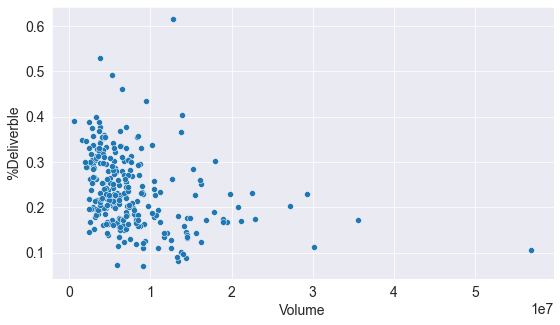

In [38]:
sns.scatterplot(x=Cipla_df_20.Volume,y=Cipla_df_20['%Deliverble'])

<AxesSubplot:xlabel='Volume', ylabel='%Deliverble'>

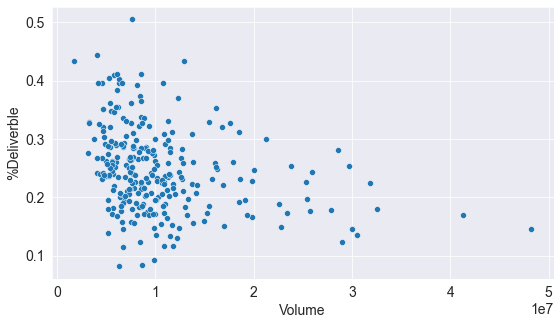

In [39]:
sns.scatterplot(x=Sun_pharma_df_20.Volume,y=Sun_pharma_df_20['%Deliverble'])

### *7) Let's plot the daily percentage change in share price on consecutive days* 

In [40]:
Dr_Reddy_df_20['Day_percentage_change']=Dr_Reddy_df_20['Close'].pct_change()*100

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\169709086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dr_Reddy_df_20['Day_percentage_change']=Dr_Reddy_df_20['Close'].pct_change()*100


In [41]:
Dr_Reddy_df_20.replace(np.nan,0)

Date   Symbol Series  Prev Close     Open     High      Low  \
5036 2020-03-30  DRREDDY     EQ     2916.50  2879.60  3050.00  2811.00   
5037 2020-03-31  DRREDDY     EQ     2994.25  3050.00  3152.00  3032.05   
5038 2020-04-01  DRREDDY     EQ     3120.75  3119.95  3144.00  3066.00   
5039 2020-04-03  DRREDDY     EQ     3095.00  3085.00  3218.85  3025.10   
5040 2020-04-07  DRREDDY     EQ     3146.80  3250.00  3615.60  3210.00   
...         ...      ...    ...         ...      ...      ...      ...   
5301 2021-04-26  DRREDDY     EQ     5066.70  5125.00  5130.00  5030.25   
5302 2021-04-27  DRREDDY     EQ     5066.70  5090.50  5116.00  5021.35   
5303 2021-04-28  DRREDDY     EQ     5057.25  5082.55  5106.90  5030.00   
5304 2021-04-29  DRREDDY     EQ     5044.45  5070.25  5144.00  5042.30   
5305 2021-04-30  DRREDDY     EQ     5102.30  5140.00  5211.00  5125.15   

         Last    Close     VWAP   Volume      Turnover    Trades  \
5036  2990.10  2994.25  2988.10  1150459  3.437685e+14   74922.0   
5037  3119.00  3120.75  3105.31  1002756  3.113864e+14   84109.0   
5038  3102.00  3095.00  3097.23   711048  2.202280e+14   67620.0   
5039  3146.85  3146.80  3143.89  1173674  3.689905e+14   95189.0   
5040  3599.95  3583.20  3476.74  2367583  8.231477e+14  141819.0   
...       ...      ...      ...      ...           ...       ...   
5301  5067.00  5066.70  5078.16   950577  4.827178e+14   70675.0   
5302  5062.00  5057.25  5065.33   957835  4.851746e+14   64767.0   
5303  5048.00  5044.45  5065.54   843953  4.275075e+14   69716.0   
5304  5106.00  5102.30  5098.90  1071931  5.465666e+14   74199.0   
5305  5169.00  5163.10  5170.81  1306950  6.757985e+14   80394.0   

      Deliverable Volume  %Deliverble  Value_change  Percentage_change  \
5036            466633.0       0.4056          0.00           0.000000   
5037            316911.0       0.3160        126.50           4.224764   
5038            269221.0       0.3786        100.75           3.364782   
5039            314667.0       0.2681        152.55           5.094765   
5040            616684.0       0.2605        588.95          19.669366   
...                  ...          ...           ...                ...   
5301            217218.0       0.2285       2072.45          69.214327   
5302            260296.0       0.2718       2063.00          68.898723   
5303            184756.0       0.2189       2050.20          68.471237   
5304            211996.0       0.1978       2108.05          70.403273   
5305            398563.0       0.3050       2168.85          72.433832   

      Moving Average_9  Moving Average_50  Day_percentage_change  
5036          0.000000              0.000               0.000000  
5037          0.000000              0.000               4.224764  
5038          0.000000              0.000              -0.825122  
5039          0.000000              0.000               1.673667  
5040          0.000000              0.000              13.868056  
...                ...                ...                    ...  
5301       4996.794444           4612.040               0.000000  
5302       5003.494444           4616.303              -0.186512  
5303       5033.177778           4620.711              -0.253102  
5304       5061.705556           4626.256               1.146805  
5305       5091.688889           4633.678               1.191619  

[270 rows x 20 columns]

<h1><center>7.1) DR.REDDY'S PERCENTAGE CHANGE ON CONSECUTIVE DAYS</center></h1>

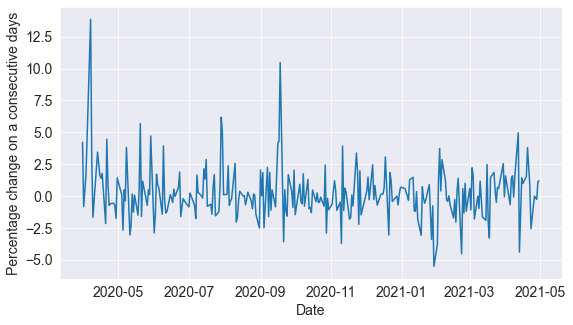

In [42]:
plt.xlabel('Date')
plt.ylabel('Percentage change on a consecutive days')
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20.Day_percentage_change);

In [43]:
Cipla_df_20['Day_percentage_change']=Cipla_df_20['Close'].pct_change()*100

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\3677030019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cipla_df_20['Day_percentage_change']=Cipla_df_20['Close'].pct_change()*100


In [44]:
Cipla_df_20.replace(np.nan,0)

Date Symbol Series  Prev Close    Open   High     Low    Last  \
5036 2020-03-30  CIPLA     EQ      407.65  413.80  438.7  407.65  435.00   
5037 2020-03-31  CIPLA     EQ      431.75  446.00  446.6  420.00  422.35   
5038 2020-04-01  CIPLA     EQ      422.85  424.90  430.9  410.40  413.55   
5039 2020-04-03  CIPLA     EQ      413.75  425.00  454.7  416.25  448.00   
5040 2020-04-07  CIPLA     EQ      449.20  479.00  513.4  452.00  492.00   
...         ...    ...    ...         ...     ...    ...     ...     ...   
5301 2021-04-26  CIPLA     EQ      935.60  935.60  940.0  902.15  907.95   
5302 2021-04-27  CIPLA     EQ      905.40  913.00  919.5  901.00  911.20   
5303 2021-04-28  CIPLA     EQ      912.40  914.35  918.0  902.95  906.25   
5304 2021-04-29  CIPLA     EQ      910.20  911.95  917.4  904.00  906.00   
5305 2021-04-30  CIPLA     EQ      906.50  900.75  921.0  900.75  910.00   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
5036  431.75  421.81   9021027  3.805120e+14  235135.0           2104985.0   
5037  422.85  432.60   9434756  4.081520e+14  145428.0           4095059.0   
5038  413.75  419.85   6329718  2.657544e+14  114574.0           2126931.0   
5039  449.20  442.98  17906777  7.932340e+14  276736.0           5394566.0   
5040  492.25  487.21  20843854  1.015534e+15  340593.0           4168507.0   
...      ...     ...       ...           ...       ...                 ...   
5301  905.40  914.11  10255697  9.374885e+14  161321.0           3451318.0   
5302  912.40  909.22   5669049  5.154420e+14  120188.0           1126288.0   
5303  910.20  909.94   7251009  6.597970e+14  134413.0           1772739.0   
5304  906.50  910.22   4953091  4.508421e+14   88604.0           1122534.0   
5305  910.35  911.47   6459737  5.887824e+14  121466.0           2004555.0   

      %Deliverble  Value_change  Percentage_change  Moving Average_9  \
5036       0.2333          0.00           0.000000          0.000000   
5037       0.4340         -8.90          -2.061378          0.000000   
5038       0.3360        -18.00          -4.169079          0.000000   
5039       0.3013         17.45           4.041691          0.000000   
5040       0.2000         60.50          14.012739          0.000000   
...           ...           ...                ...               ...   
5301       0.3365        473.65         109.704690        924.533333   
5302       0.1987        480.65         111.325999        925.644444   
5303       0.2445        478.45         110.816445        928.422222   
5304       0.2266        474.75         109.959467        927.566667   
5305       0.3103        478.60         110.851187        924.488889   

      Moving Average_50  Day_percentage_change  
5036              0.000               0.000000  
5037              0.000              -2.061378  
5038              0.000              -2.152063  
5039              0.000               8.567976  
5040              0.000               9.583704  
...                 ...                    ...  
5301            831.689              -3.227875  
5302            833.102               0.773139  
5303            834.038              -0.241122  
5304            834.972              -0.406504  
5305            836.208               0.424710  

[270 rows x 20 columns]

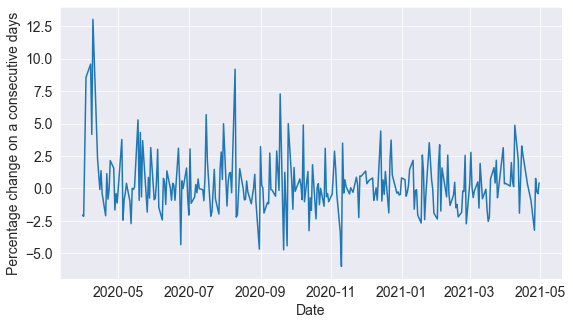

In [45]:
plt.xlabel('Date')
plt.ylabel('Percentage change on a consecutive days')
plt.plot(Cipla_df_20.Date,Cipla_df_20.Day_percentage_change);

In [46]:
Sun_pharma_df_20['Day_percentage_change']=Sun_pharma_df_20['Close'].pct_change()*100

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\1792526810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sun_pharma_df_20['Day_percentage_change']=Sun_pharma_df_20['Close'].pct_change()*100


In [47]:
Sun_pharma_df_20.replace(np.nan,0)

Date     Symbol Series  Prev Close    Open    High     Low    Last  \
5036 2020-03-30  SUNPHARMA     EQ      338.25  321.65  344.00  312.00  332.55   
5037 2020-03-31  SUNPHARMA     EQ      332.70  340.10  355.00  328.25  353.25   
5038 2020-04-01  SUNPHARMA     EQ      352.30  353.00  355.25  338.40  344.35   
5039 2020-04-03  SUNPHARMA     EQ      343.55  343.95  389.80  340.00  376.45   
5040 2020-04-07  SUNPHARMA     EQ      375.95  398.00  422.85  388.30  415.55   
...         ...        ...    ...         ...     ...     ...     ...     ...   
5301 2021-04-26  SUNPHARMA     EQ      637.95  644.00  644.00  631.00  633.45   
5302 2021-04-27  SUNPHARMA     EQ      634.70  632.70  642.45  632.00  638.00   
5303 2021-04-28  SUNPHARMA     EQ      639.25  640.95  647.30  638.30  643.30   
5304 2021-04-29  SUNPHARMA     EQ      643.40  648.95  652.00  641.10  646.80   
5305 2021-04-30  SUNPHARMA     EQ      644.50  642.00  666.60  640.10  653.75   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
5036  332.70  334.25  11648309  3.893470e+14  143583.0           3629631.0   
5037  352.30  343.95   9954246  3.423745e+14  131072.0           2978206.0   
5038  343.55  344.57   6702259  2.309379e+14   94680.0           2249335.0   
5039  375.95  369.67  28550650  1.055423e+15  338973.0           8027405.0   
5040  417.35  407.17  29675452  1.208288e+15  343700.0           7501033.0   
...      ...     ...       ...           ...       ...                 ...   
5301  634.70  634.61   6527947  4.142697e+14  102313.0           1899919.0   
5302  639.25  636.72   5112384  3.255177e+14   83078.0           1315490.0   
5303  643.40  642.77   6069155  3.901097e+14   89304.0           2493978.0   
5304  644.50  646.32   5676290  3.668690e+14   94646.0           1201983.0   
5305  654.45  655.94  10874266  7.132852e+14  145185.0           2412903.0   

      %Deliverble  Value_change  Percentage_change  Moving Average_9  \
5036       0.3116          0.00           0.000000          0.000000   
5037       0.2992         19.60           5.891193          0.000000   
5038       0.3356         10.85           3.261196          0.000000   
5039       0.2812         43.25          12.999699          0.000000   
5040       0.2528         84.65          25.443342          0.000000   
...           ...           ...                ...               ...   
5301       0.2910        302.00          90.772468        636.044444   
5302       0.2573        306.55          92.140066        638.255556   
5303       0.4109        310.70          93.387436        640.038889   
5304       0.2118        311.80          93.718064        641.288889   
5305       0.2219        321.75          96.708747        642.222222   

      Moving Average_50  Day_percentage_change  
5036              0.000               0.000000  
5037              0.000               5.891193  
5038              0.000              -2.483679  
5039              0.000               9.430942  
5040              0.000              11.012103  
...                 ...                    ...  
5301            613.486              -0.509444  
5302            613.799               0.716874  
5303            614.125               0.649198  
5304            614.142               0.170967  
5305            614.688               1.543832  

[270 rows x 20 columns]

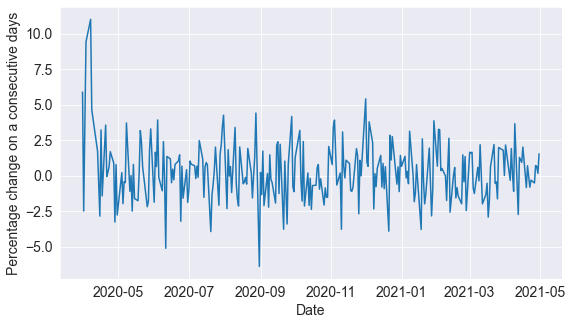

In [48]:
plt.xlabel('Date')
plt.ylabel('Percentage change on a consecutive days')
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20.Day_percentage_change);

### *8) Let's plot a histogram for daily returns*  

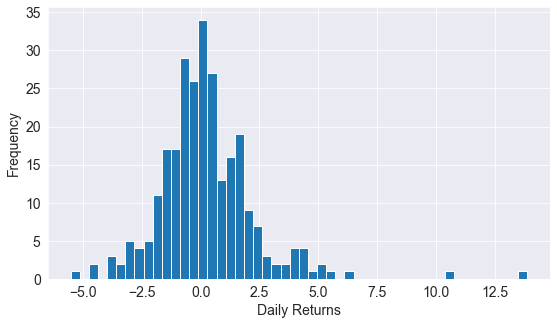

In [49]:
Dr_Reddy_df_20['Day_percentage_change'].hist(bins=50)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency');

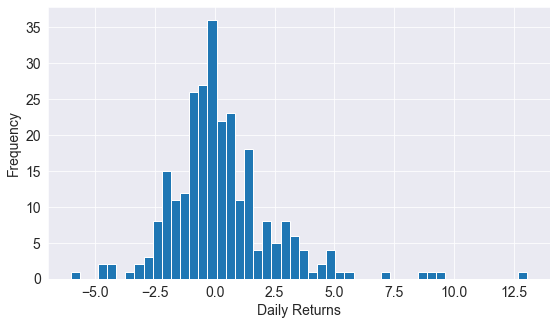

In [50]:
Cipla_df_20['Day_percentage_change'].hist(bins=50)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency');

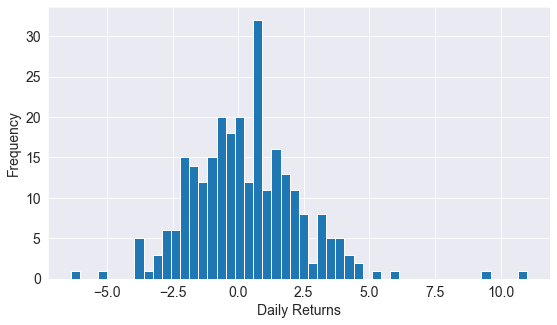

In [51]:
Sun_pharma_df_20['Day_percentage_change'].hist(bins=50)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency');

### *9) Let's make a plot with respect to percentage change and Closing price on that day*

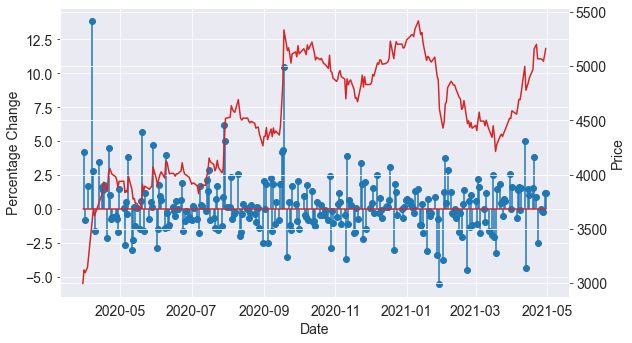

In [52]:
fig,ax1=plt.subplots()
ax1.stem(Dr_Reddy_df_20.Date,Dr_Reddy_df_20.Day_percentage_change)
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage Change')
ax2=ax1.twinx()
ax2.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20.Close,color='tab:red')
ax2.set_ylabel('Price')
fig.tight_layout()

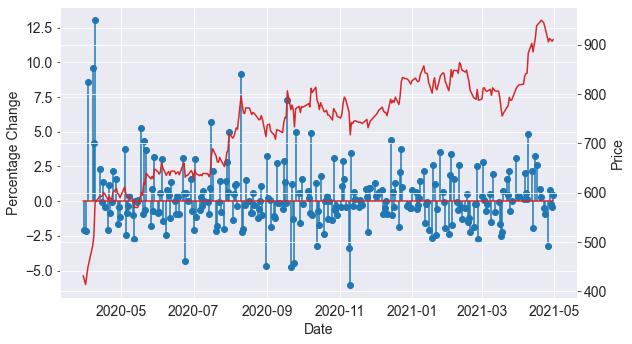

In [53]:
fig,ax1=plt.subplots()
ax1.stem(Cipla_df_20.Date,Cipla_df_20.Day_percentage_change)
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage Change')
ax2=ax1.twinx()
ax2.plot(Cipla_df_20.Date,Cipla_df_20.Close,color='tab:red')
ax2.set_ylabel('Price')
fig.tight_layout()

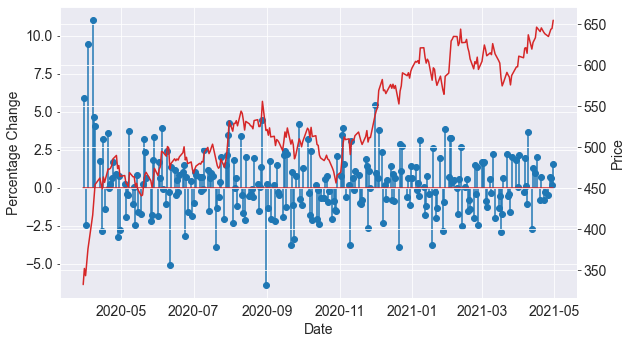

In [54]:
fig,ax1=plt.subplots()
ax1.stem(Sun_pharma_df_20.Date,Sun_pharma_df_20.Day_percentage_change)
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage Change')
ax2=ax1.twinx()
ax2.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20.Close,color='tab:red')
ax2.set_ylabel('Price')
fig.tight_layout()

### *10) Let's plot a chart which shows the volume happended on the day and percentage change w.r.to previous day*

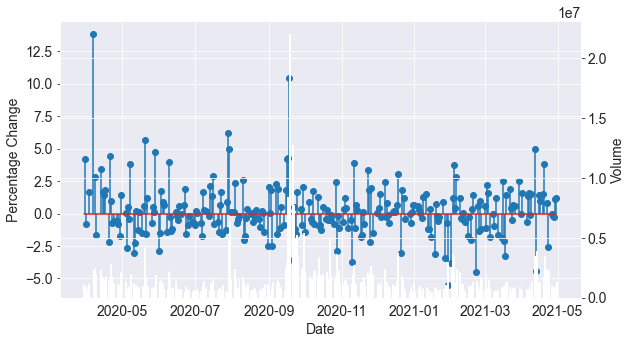

In [55]:
sns.set_style("darkgrid")
fig,ax1=plt.subplots()
ax1.stem(Dr_Reddy_df_20.Date,Dr_Reddy_df_20.Day_percentage_change)
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage Change')
ax2=ax1.twinx()
ax2.bar(Dr_Reddy_df_20.Date,Dr_Reddy_df_20.Volume)
ax2.set_ylabel('Volume')
fig.tight_layout()

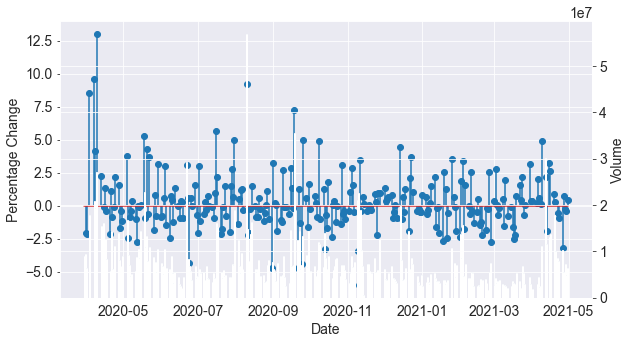

In [56]:
sns.set_style("darkgrid")
fig,ax1=plt.subplots()
ax1.stem(Cipla_df_20.Date,Cipla_df_20.Day_percentage_change)
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage Change')
ax2=ax1.twinx()
ax2.bar(Cipla_df_20.Date,Cipla_df_20.Volume)
ax2.set_ylabel('Volume')
fig.tight_layout()

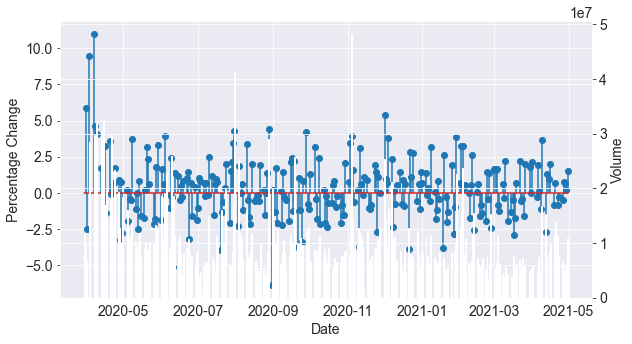

In [57]:
sns.set_style("darkgrid")
fig,ax1=plt.subplots()
ax1.stem(Sun_pharma_df_20.Date,Sun_pharma_df_20.Day_percentage_change)
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage Change')
ax2=ax1.twinx()
ax2.bar(Sun_pharma_df_20.Date,Sun_pharma_df_20.Volume)
ax2.set_ylabel('Volume')
fig.tight_layout()

### *11) Let's plot the Exponential Moving Average plots for all the dataframes*

In [58]:
Dr_Reddy_df_20['EMA_0.1']=Dr_Reddy_df_20.Close.ewm(alpha=0.1,adjust=False).mean()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\2436387312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dr_Reddy_df_20['EMA_0.1']=Dr_Reddy_df_20.Close.ewm(alpha=0.1,adjust=False).mean()


In [59]:
Dr_Reddy_df_20

Date   Symbol Series  Prev Close     Open     High      Low  \
5036 2020-03-30  DRREDDY     EQ     2916.50  2879.60  3050.00  2811.00   
5037 2020-03-31  DRREDDY     EQ     2994.25  3050.00  3152.00  3032.05   
5038 2020-04-01  DRREDDY     EQ     3120.75  3119.95  3144.00  3066.00   
5039 2020-04-03  DRREDDY     EQ     3095.00  3085.00  3218.85  3025.10   
5040 2020-04-07  DRREDDY     EQ     3146.80  3250.00  3615.60  3210.00   
...         ...      ...    ...         ...      ...      ...      ...   
5301 2021-04-26  DRREDDY     EQ     5066.70  5125.00  5130.00  5030.25   
5302 2021-04-27  DRREDDY     EQ     5066.70  5090.50  5116.00  5021.35   
5303 2021-04-28  DRREDDY     EQ     5057.25  5082.55  5106.90  5030.00   
5304 2021-04-29  DRREDDY     EQ     5044.45  5070.25  5144.00  5042.30   
5305 2021-04-30  DRREDDY     EQ     5102.30  5140.00  5211.00  5125.15   

         Last    Close     VWAP  ...      Turnover    Trades  \
5036  2990.10  2994.25  2988.10  ...  3.437685e+14   74922.0   
5037  3119.00  3120.75  3105.31  ...  3.113864e+14   84109.0   
5038  3102.00  3095.00  3097.23  ...  2.202280e+14   67620.0   
5039  3146.85  3146.80  3143.89  ...  3.689905e+14   95189.0   
5040  3599.95  3583.20  3476.74  ...  8.231477e+14  141819.0   
...       ...      ...      ...  ...           ...       ...   
5301  5067.00  5066.70  5078.16  ...  4.827178e+14   70675.0   
5302  5062.00  5057.25  5065.33  ...  4.851746e+14   64767.0   
5303  5048.00  5044.45  5065.54  ...  4.275075e+14   69716.0   
5304  5106.00  5102.30  5098.90  ...  5.465666e+14   74199.0   
5305  5169.00  5163.10  5170.81  ...  6.757985e+14   80394.0   

      Deliverable Volume  %Deliverble  Value_change  Percentage_change  \
5036            466633.0       0.4056          0.00           0.000000   
5037            316911.0       0.3160        126.50           4.224764   
5038            269221.0       0.3786        100.75           3.364782   
5039            314667.0       0.2681        152.55           5.094765   
5040            616684.0       0.2605        588.95          19.669366   
...                  ...          ...           ...                ...   
5301            217218.0       0.2285       2072.45          69.214327   
5302            260296.0       0.2718       2063.00          68.898723   
5303            184756.0       0.2189       2050.20          68.471237   
5304            211996.0       0.1978       2108.05          70.403273   
5305            398563.0       0.3050       2168.85          72.433832   

      Moving Average_9  Moving Average_50  Day_percentage_change      EMA_0.1  
5036               NaN                NaN                    NaN  2994.250000  
5037               NaN                NaN               4.224764  3006.900000  
5038               NaN                NaN              -0.825122  3015.710000  
5039               NaN                NaN               1.673667  3028.819000  
5040               NaN                NaN              13.868056  3084.257100  
...                ...                ...                    ...          ...  
5301       4996.794444           4612.040               0.000000  4836.009563  
5302       5003.494444           4616.303              -0.186512  4858.133606  
5303       5033.177778           4620.711              -0.253102  4876.765246  
5304       5061.705556           4626.256               1.146805  4899.318721  
5305       5091.688889           4633.678               1.191619  4925.696849  

[270 rows x 21 columns]

In [60]:
Dr_Reddy_df_20['EMA_0.3']=Dr_Reddy_df_20.Close.ewm(alpha=0.3,adjust=False).mean()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\788201185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dr_Reddy_df_20['EMA_0.3']=Dr_Reddy_df_20.Close.ewm(alpha=0.3,adjust=False).mean()


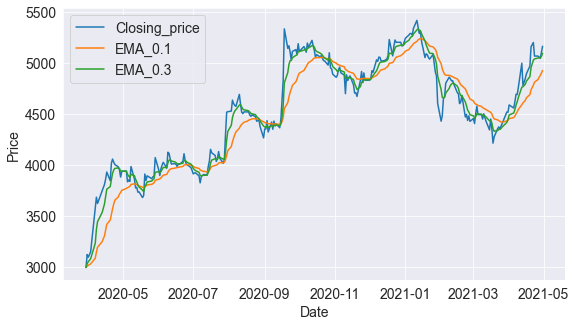

In [61]:
# Exponential Moving Average with 0.1 factor and0.3 factor
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20.Close)
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20['EMA_0.1'])
plt.plot(Dr_Reddy_df_20.Date,Dr_Reddy_df_20['EMA_0.3'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Closing_price','EMA_0.1','EMA_0.3'])

In [62]:
Cipla_df_20['EMA_0.1']=Cipla_df_20.Close.ewm(alpha=0.1,adjust=False).mean()
Cipla_df_20['EMA_0.3']=Cipla_df_20.Close.ewm(alpha=0.3,adjust=False).mean()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\2140373069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cipla_df_20['EMA_0.1']=Cipla_df_20.Close.ewm(alpha=0.1,adjust=False).mean()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\2140373069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cipla_df_20['EMA_0.3']=Cipla_df_20.Close.ewm(alpha=0.3,adjust=False).mean()


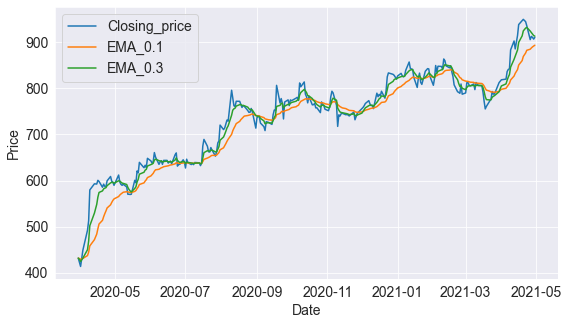

In [63]:
# Exponential Moving Average with 0.1 factor and0.3 factor
plt.plot(Cipla_df_20.Date,Cipla_df_20.Close)
plt.plot(Cipla_df_20.Date,Cipla_df_20['EMA_0.1'])
plt.plot(Cipla_df_20.Date,Cipla_df_20['EMA_0.3'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Closing_price','EMA_0.1','EMA_0.3'])

In [64]:
Sun_pharma_df_20['EMA_0.1']=Sun_pharma_df_20.Close.ewm(alpha=0.1,adjust=False).mean()
Sun_pharma_df_20['EMA_0.3']=Sun_pharma_df_20.Close.ewm(alpha=0.3,adjust=False).mean()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\2962025498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sun_pharma_df_20['EMA_0.1']=Sun_pharma_df_20.Close.ewm(alpha=0.1,adjust=False).mean()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_6308\2962025498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sun_pharma_df_20['EMA_0.3']=Sun_pharma_df_20.Close.ewm(alpha=0.3,adjust=False).mean()


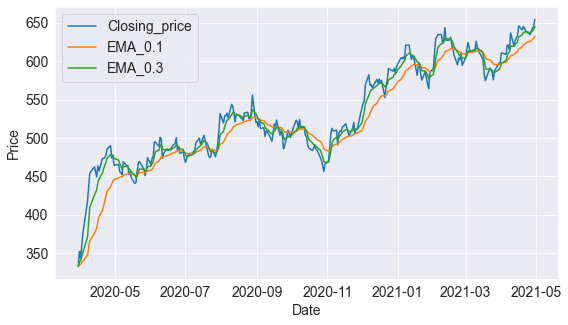

In [65]:
# Exponential Moving Average with 0.1 factor and0.3 factor
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20.Close)
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20['EMA_0.1'])
plt.plot(Sun_pharma_df_20.Date,Sun_pharma_df_20['EMA_0.3'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Closing_price','EMA_0.1','EMA_0.3'])

### *12) Plotting of pairplot i.e all the possible plots in a single figure*

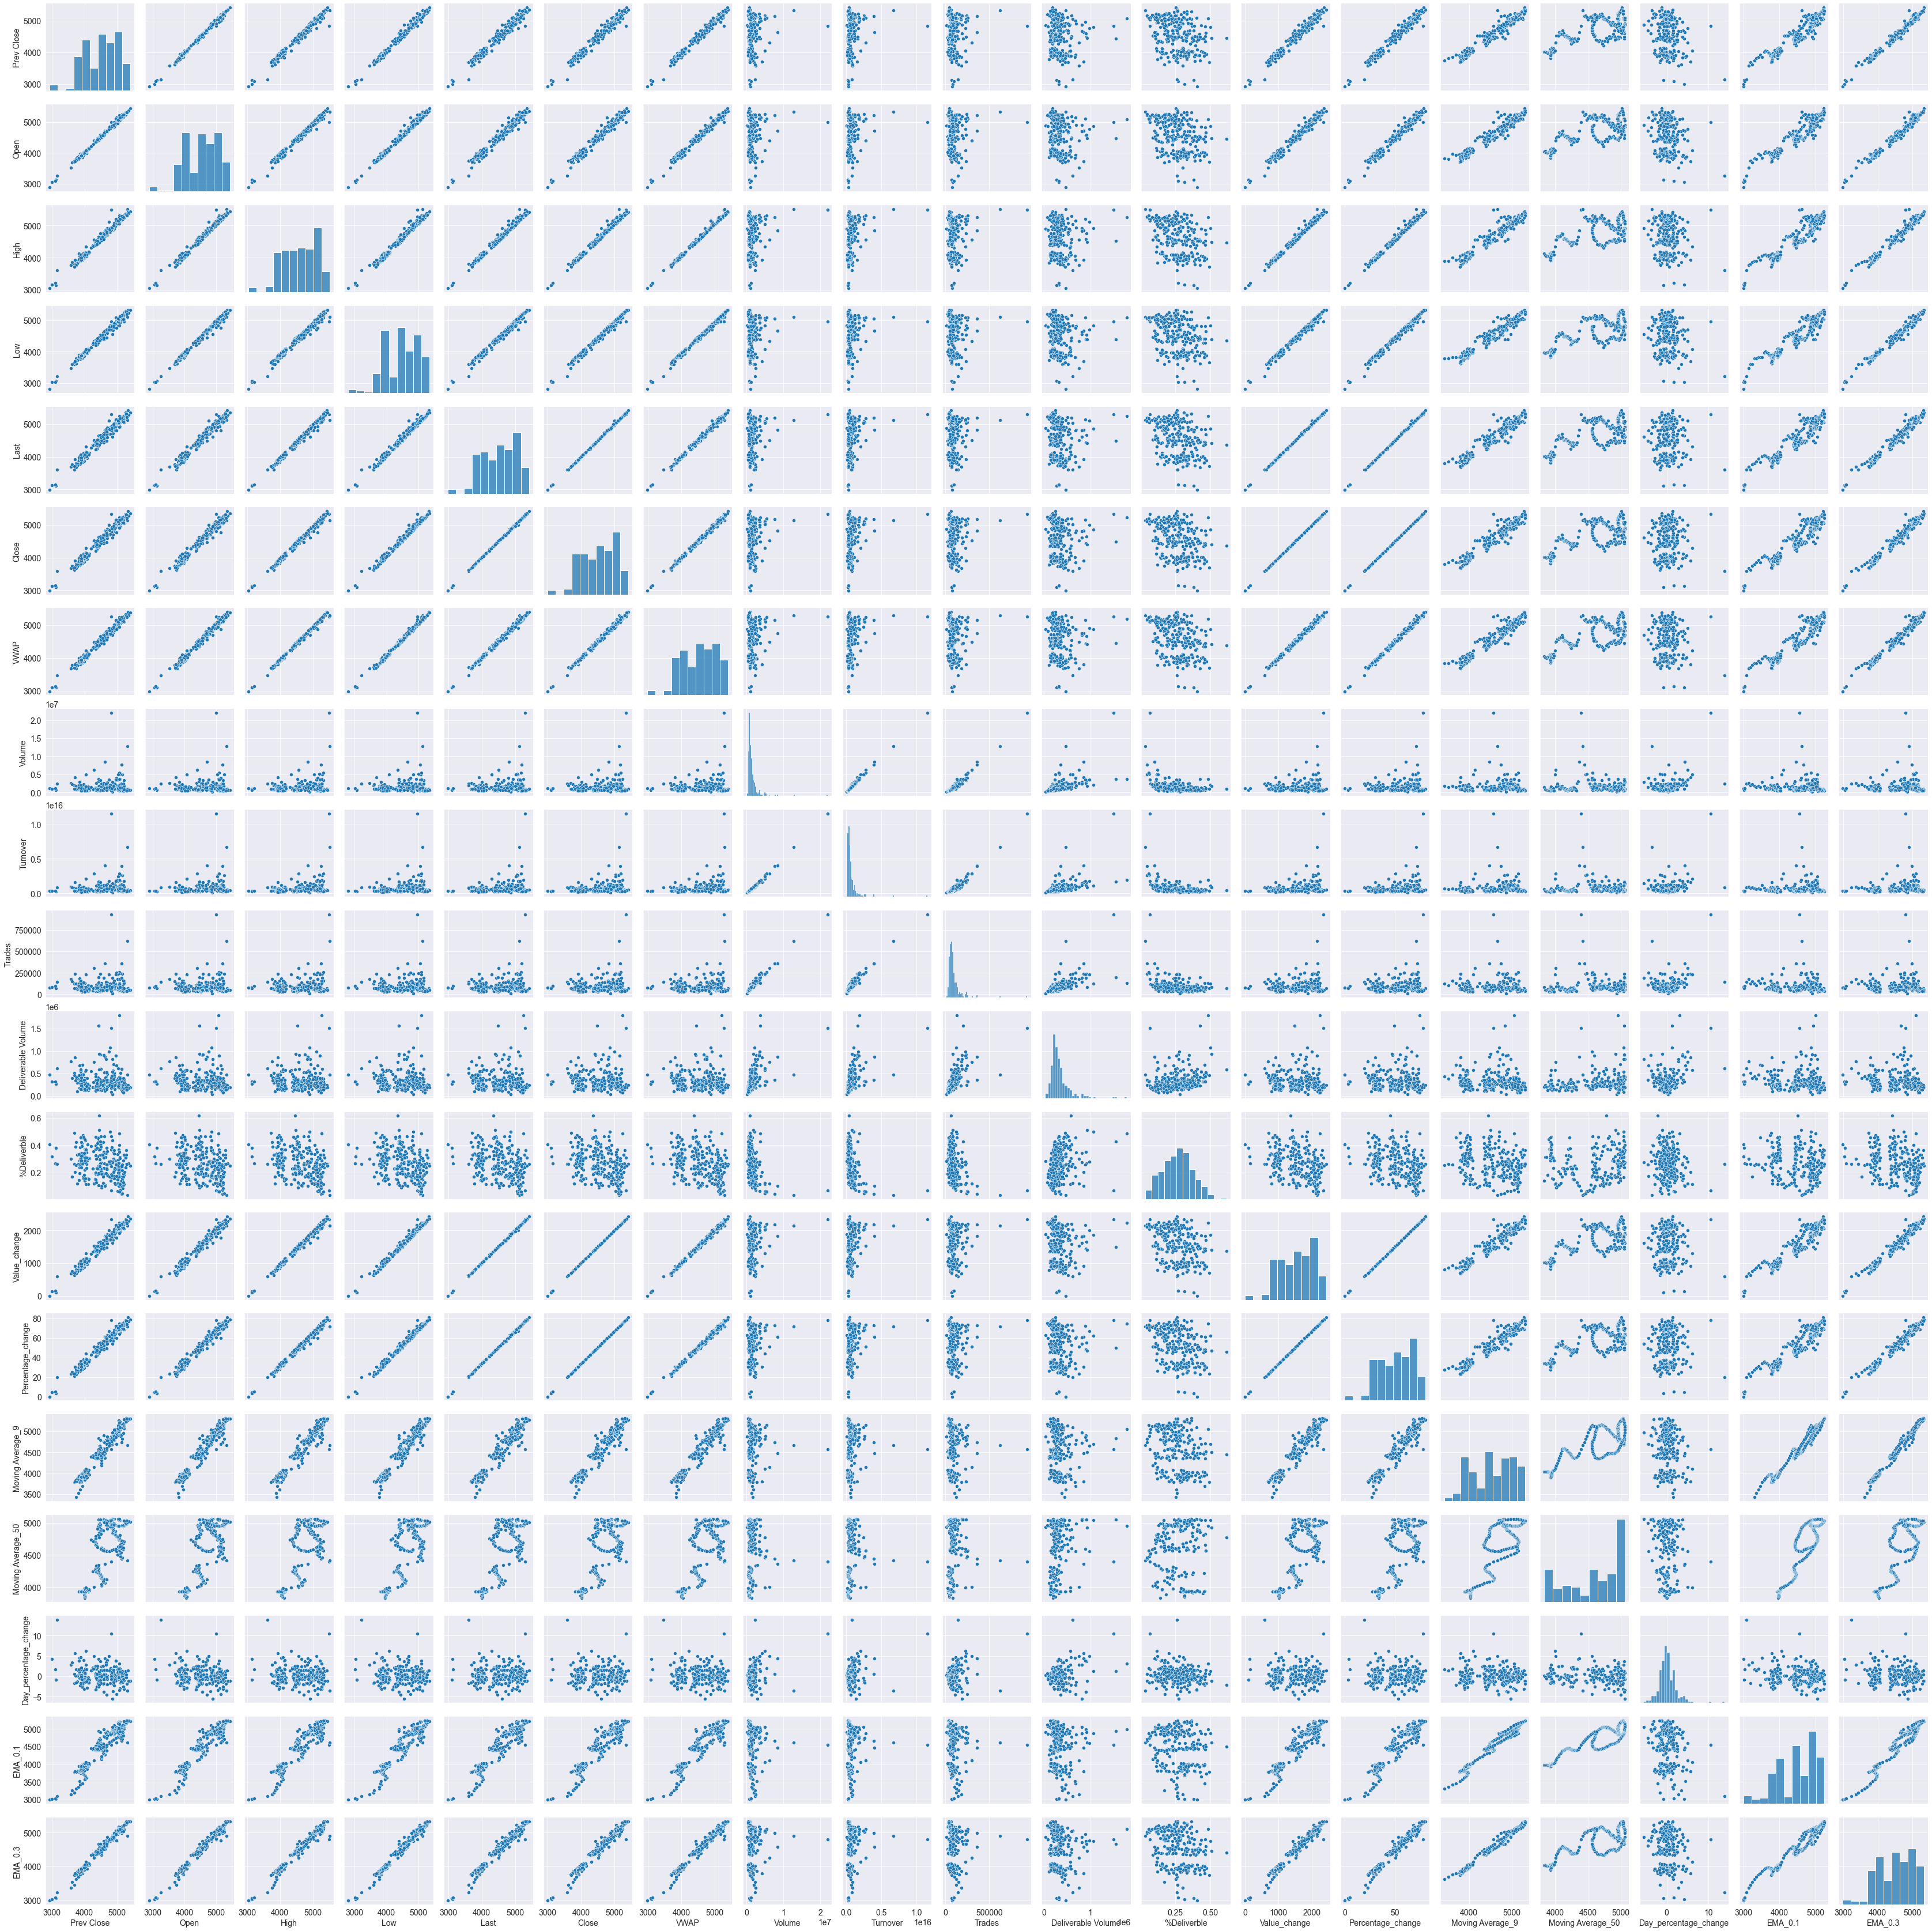

In [66]:
sns.pairplot(Dr_Reddy_df_20)

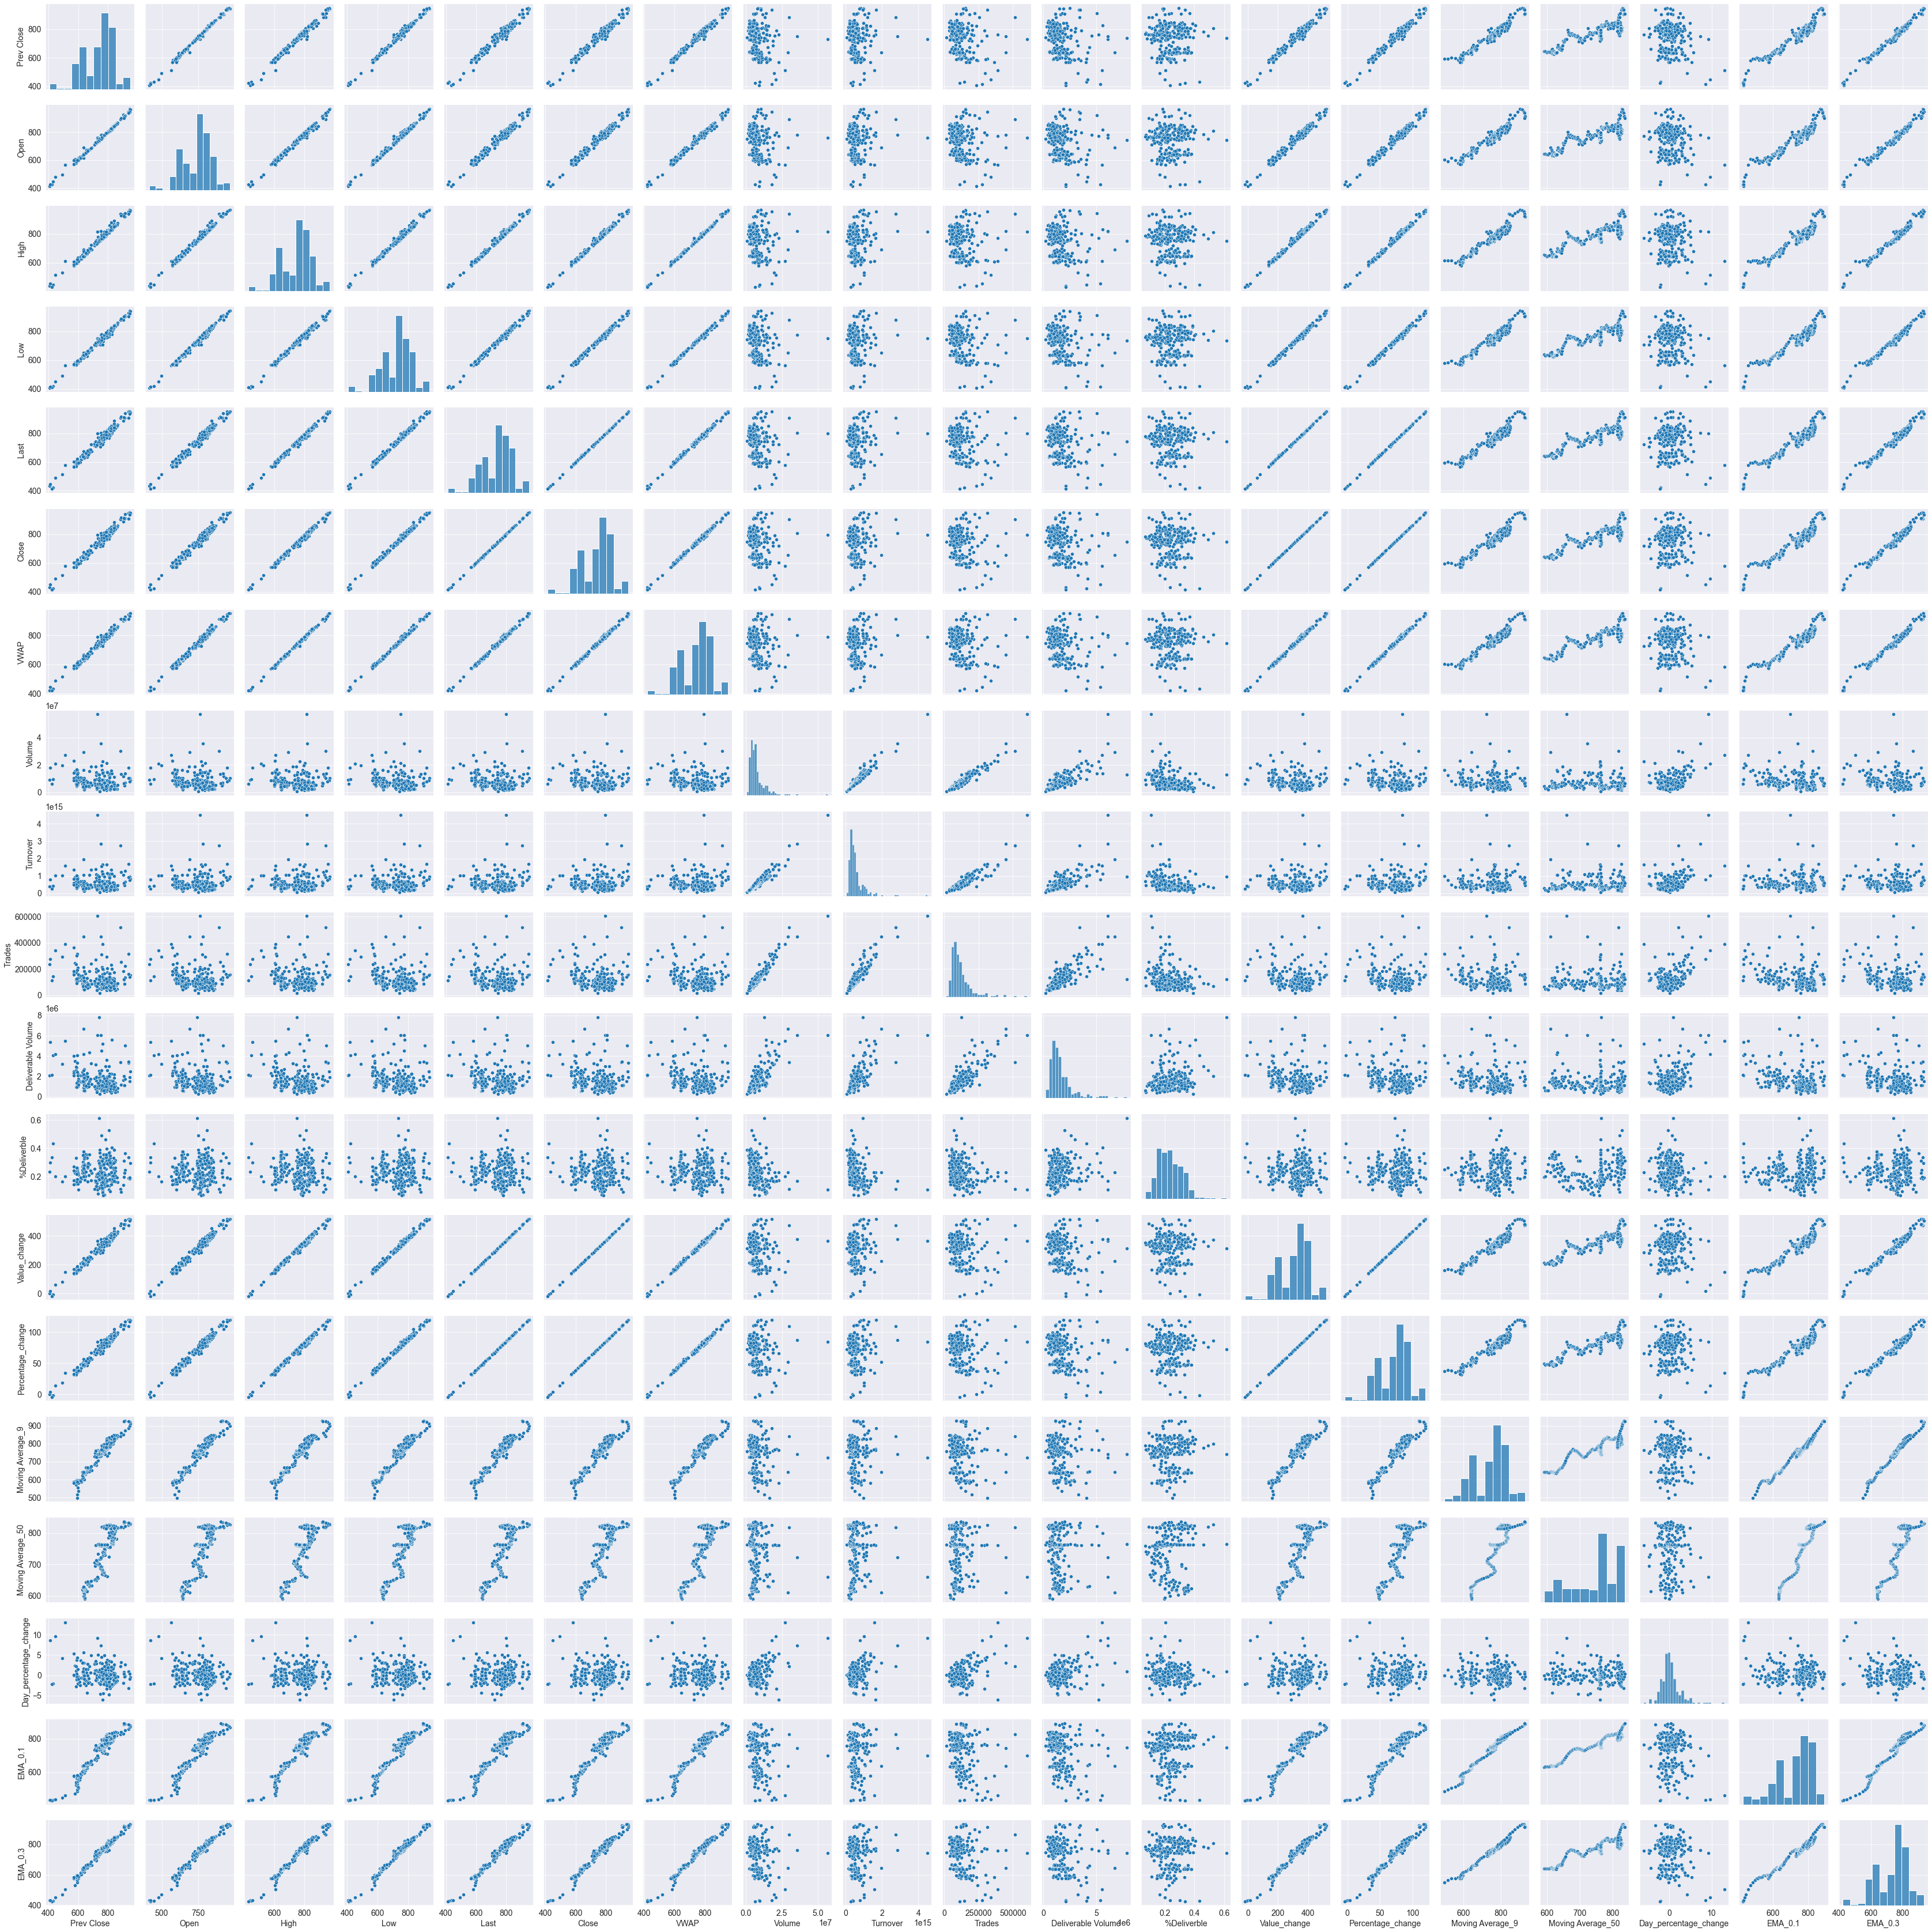

In [67]:
sns.pairplot(Cipla_df_20)

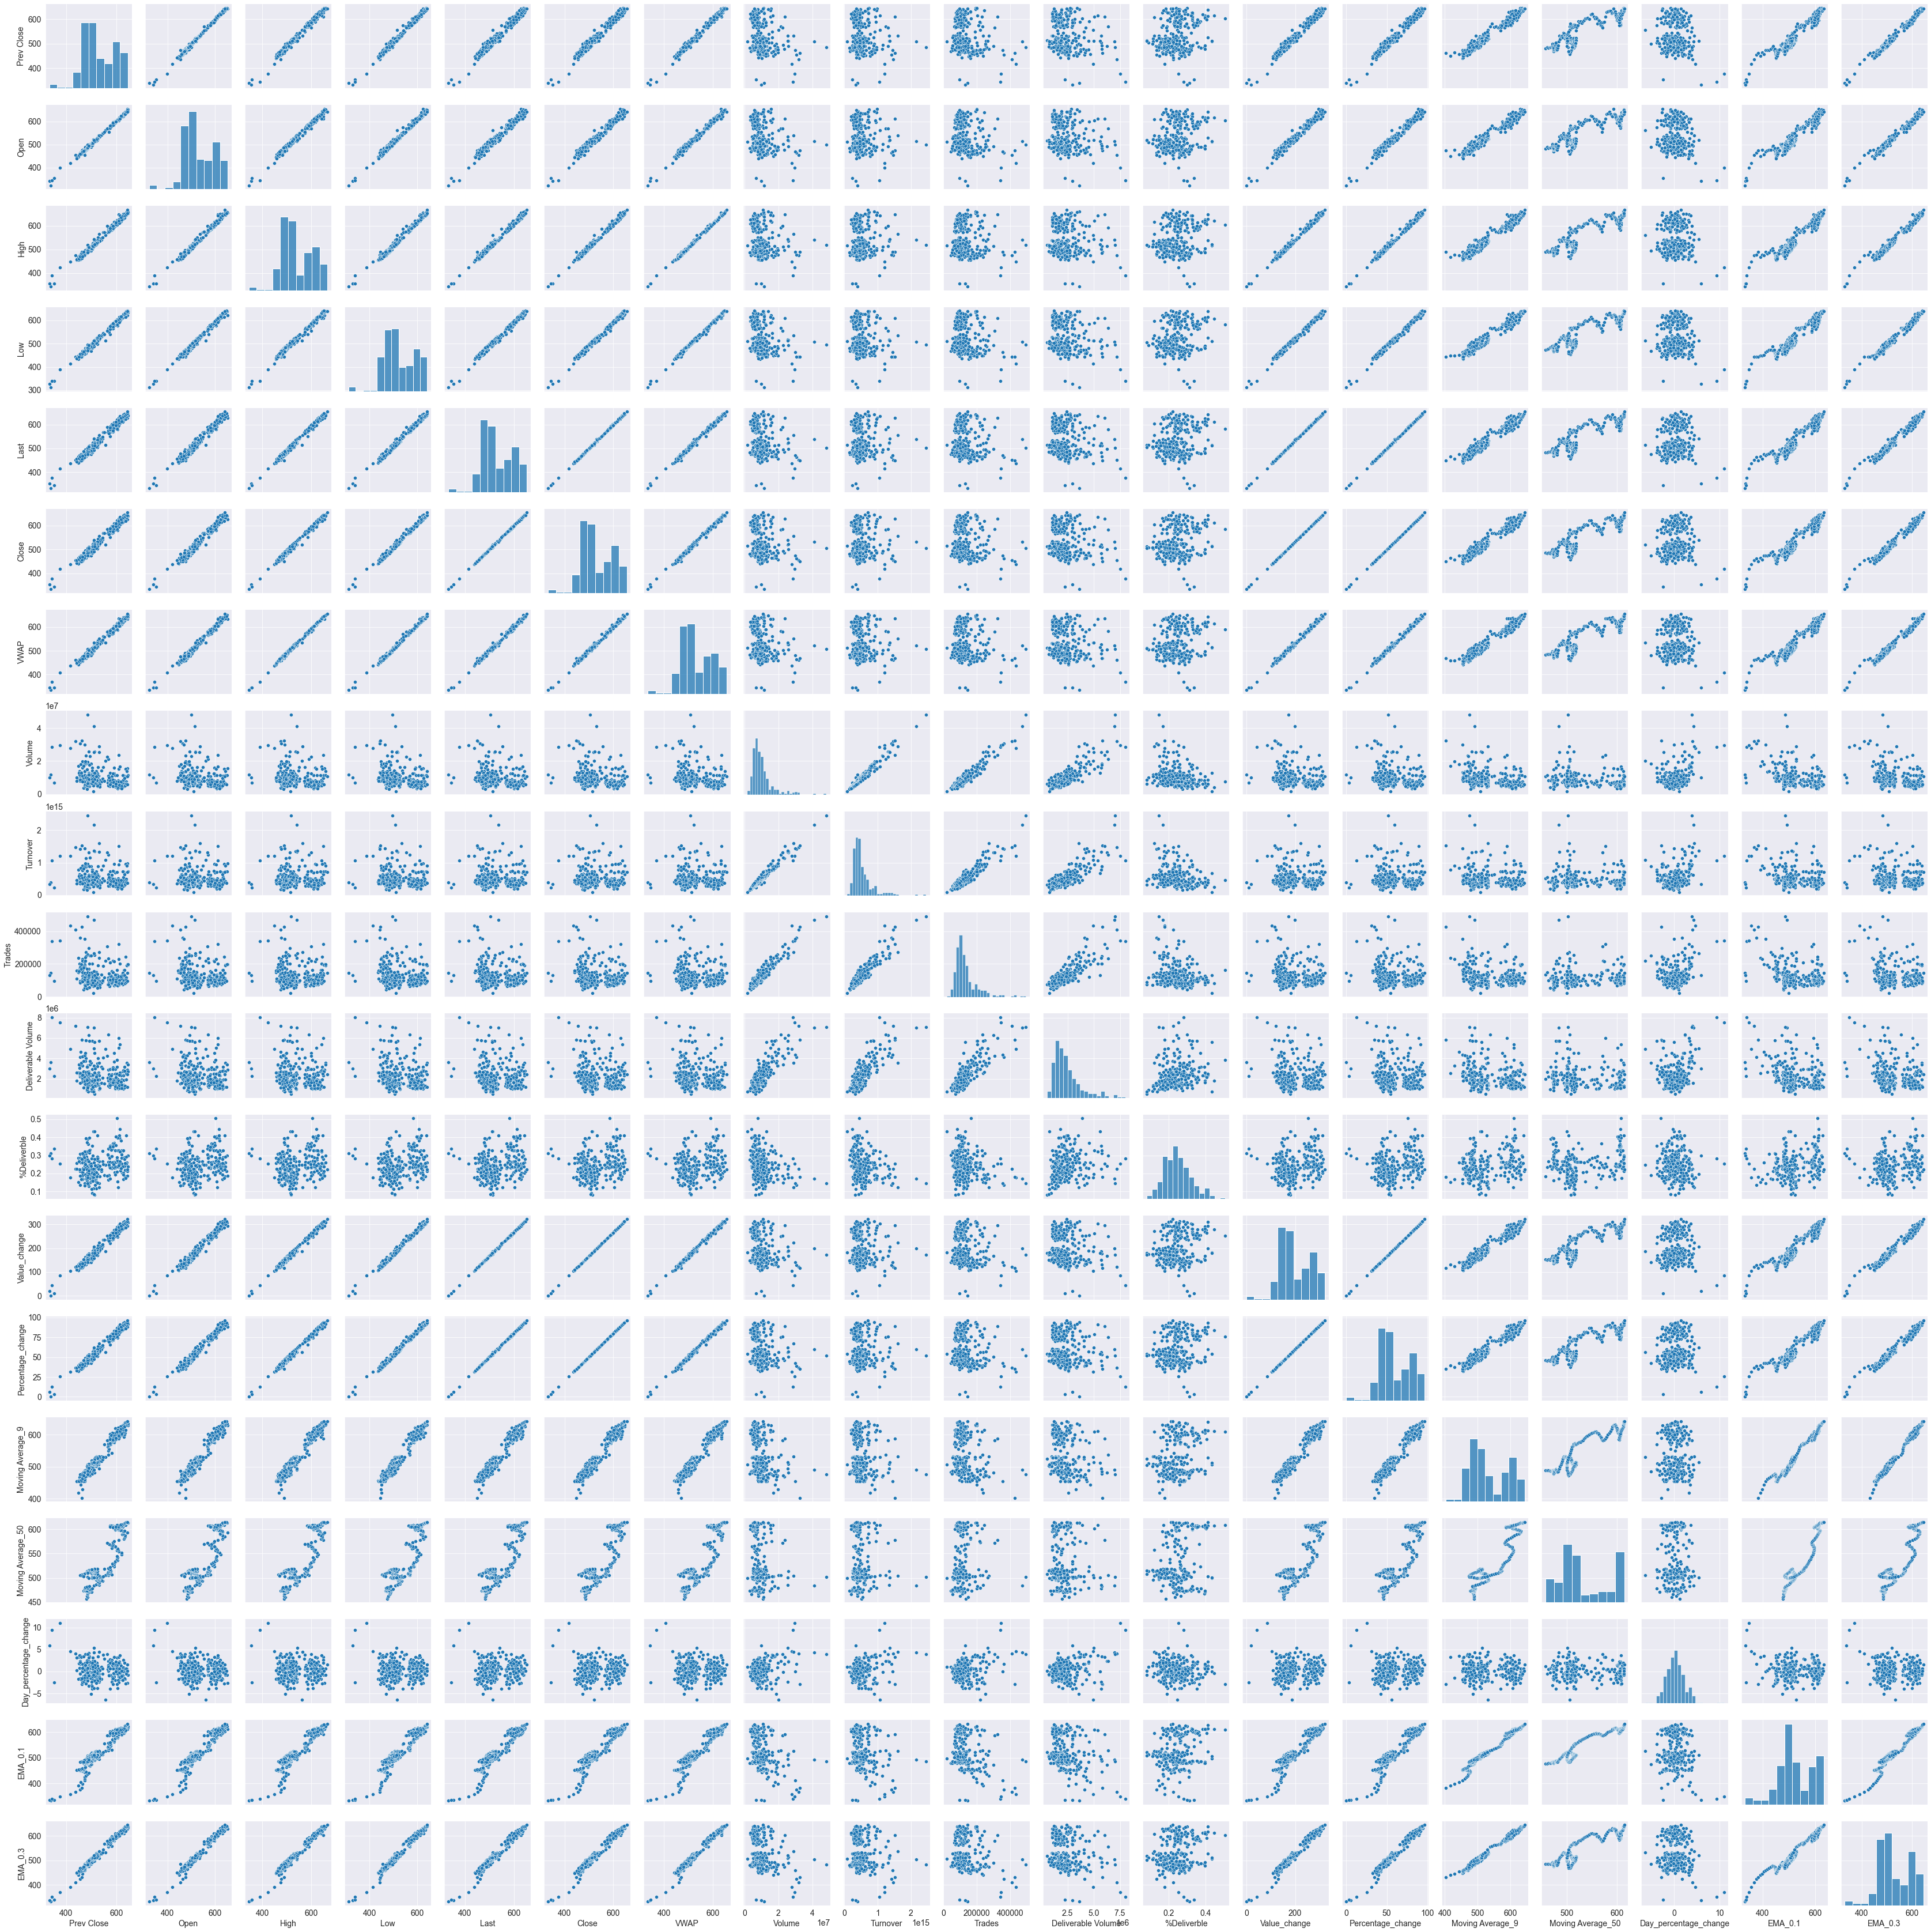

In [68]:
sns.pairplot(Sun_pharma_df_20)